In [1]:
!pip install numpy pandas scikit-learn tensorflow pyswarms matplotlib openpyxl

  Using cached flatbuffers-25.2.10-py2.py3-none-any.whl.metadata (875 bytes)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 252.6/252.6 MB 3.0 MB/s eta 0:00:0000:0100:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.1/104.1 kB 51.2 kB/s eta 0:00:0000:010:01m
Using cached flatbuffers-25.2.10-py2.py3-none-any.whl (30 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 2.1 MB/s eta 0:00:0000:0100:010m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 1.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.8/25.8 MB 2.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 671.4/671.4 kB 1.3 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 2.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 2.2 MB/s eta 0:00:0000:0100:01


In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
import pyswarms as ps

# 1. Load your dataset
df = pd.read_excel('sea_temp.xlsx')
series = df['Sea Surface Temperature (Deg C)'].values.reshape(-1, 1)
df.head()


,Year,Month,Date,Sea Surface Temperature (Deg C)
0,1900,1,1900-01,26.32
1,1900,2,1900-02,26.45
2,1900,3,1900-03,27.57
3,1900,4,1900-04,29.15
4,1900,5,1900-05,29.76


2025-07-07 19:53:12,672 - pyswarms.single.global_best - INFO - Optimize for 20 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best:   0%|          |0/20/Users/sushantravva/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
pyswarms.single.global_best: 100%|██████████|20/20, best_cost=0.00219
2025-07-07 20:14:35,993 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.002186209661886096, best pos: [6.36172751e+01 8.60940876e-03 3.00414338e+01 2.81865142e+01]


Best hyperparameters found: [6.36172751e+01 8.60940876e-03 3.00414338e+01 2.81865142e+01]
Epoch 1/28
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1125  
Epoch 2/28
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0381
Epoch 3/28
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0321
Epoch 4/28
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0127
Epoch 5/28
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0060
Epoch 6/28
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0050
Epoch 7/28
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0054
Epoch 8/28
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0033
Epoch 9/28
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0034
Epoch 10/28
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0031
Epoch 11/28
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0032
Epoch 12/28
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0029
Epoch 13/28
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0041
Epoch 14/28
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 

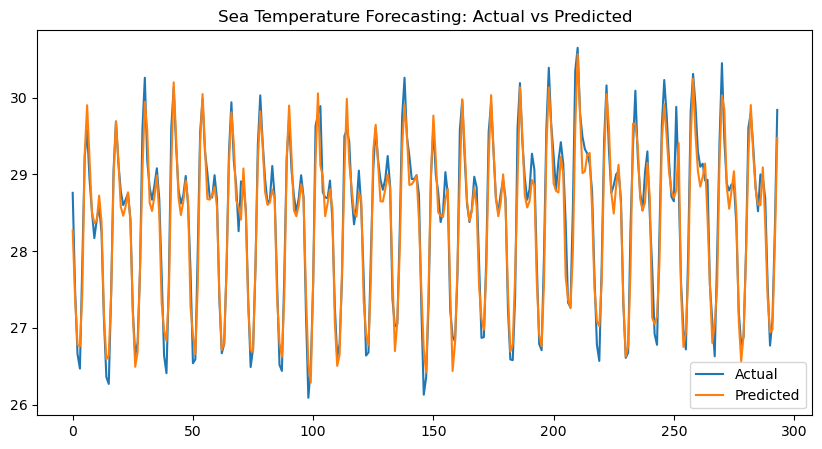

In [2]:
# 2. Normalize and create sequences
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(series)

SEQ_LENGTH = 12  # You can adjust this for your data

def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

X, y = create_sequences(data_scaled, SEQ_LENGTH)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, shuffle=False)

# 3. Define LSTM builder
def build_lstm(input_shape, units, learning_rate):
    model = Sequential()
    model.add(LSTM(units, input_shape=input_shape))
    model.add(Dense(1))
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mse')
    return model

# 4. PSO Objective Function
def pso_objective(hyperparams):
    losses = []
    for params in hyperparams:
        units = int(params[0])
        learning_rate = params[1]
        batch_size = int(params[2])
        epochs = int(params[3])
        model = build_lstm((SEQ_LENGTH, 1), units, learning_rate)
        try:
            model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0)
            loss = model.evaluate(X_val, y_val, verbose=0)
        except Exception as e:
            loss = np.inf
        losses.append(loss)
    return np.array(losses)

# 5. Run PSO
bounds = ([10, 0.0001, 8, 10], [100, 0.01, 64, 50])
optimizer = ps.single.GlobalBestPSO(
    n_particles=20, dimensions=4, options={'c1': 0.5, 'c2': 0.3, 'w': 0.9},
    bounds=bounds
)
best_cost, best_pos = optimizer.optimize(pso_objective, iters=20)
print("Best hyperparameters found:", best_pos)

# 6. Train final model
units = int(best_pos[0])
learning_rate = best_pos[1]
batch_size = int(best_pos[2])
epochs = int(best_pos[3])

final_model = build_lstm((SEQ_LENGTH, 1), units, learning_rate)
final_model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1)
val_loss = final_model.evaluate(X_val, y_val)
print(f"Validation Loss: {val_loss}")

# 7. (Optional) Inverse transform predictions for interpretation
y_pred = final_model.predict(X_val)
y_pred_inv = scaler.inverse_transform(y_pred)
y_val_inv = scaler.inverse_transform(y_val)

# Plot results
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(y_val_inv, label='Actual')
plt.plot(y_pred_inv, label='Predicted')
plt.legend()
plt.title('Sea Temperature Forecasting: Actual vs Predicted')
plt.show()

/Users/sushantravva/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Metric Comparison Table:
Model               MSE            RMSE           MAE            
Baseline LSTM       0.0913         0.3021         0.2434         
PSO-Optimized LSTM  0.0662         0.2572         0.1981         


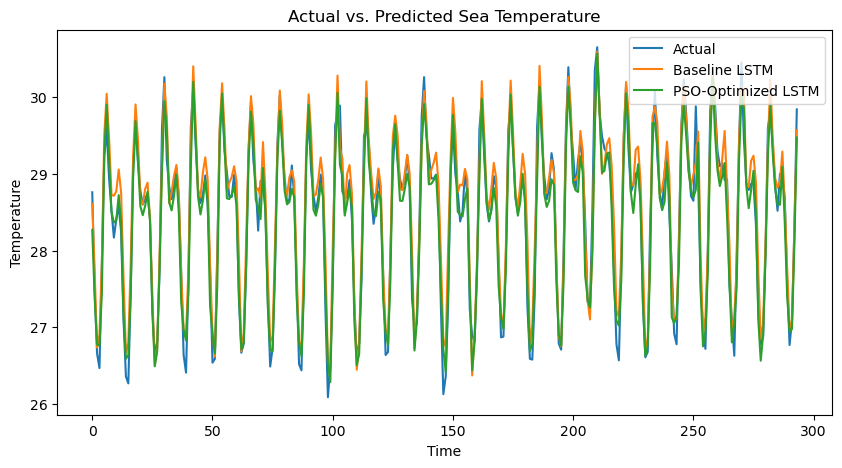

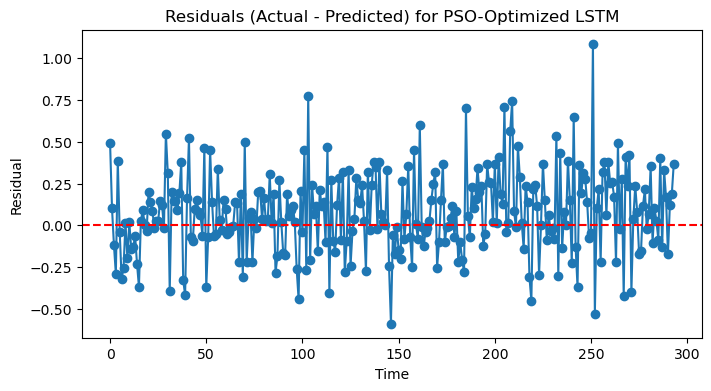

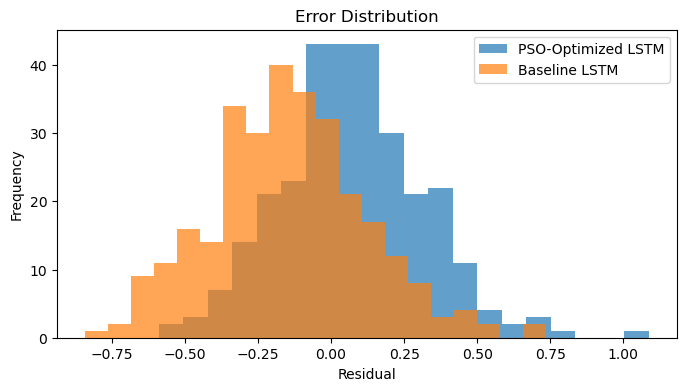

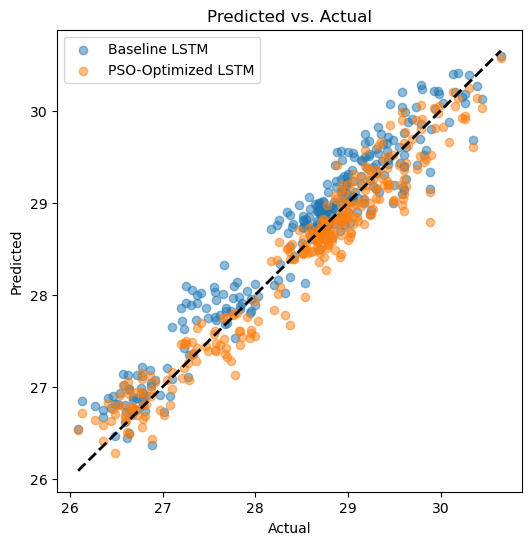

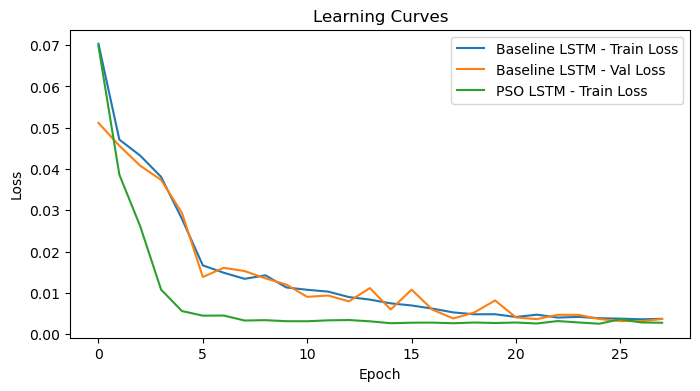

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

# --- Helper: Metrics ---
def compute_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    return mse, rmse, mae

# --- 1. Baseline LSTM (no PSO) ---
def build_and_train_baseline(X_train, y_train, X_val, y_val, seq_length):
    model = Sequential()
    model.add(LSTM(50, input_shape=(seq_length, 1)))  # 50 units, default
    model.add(Dense(1))
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0, validation_data=(X_val, y_val))
    return model, history

baseline_model, baseline_history = build_and_train_baseline(X_train, y_train, X_val, y_val, SEQ_LENGTH)
y_pred_baseline = baseline_model.predict(X_val)
y_pred_baseline_inv = scaler.inverse_transform(y_pred_baseline)
y_val_inv = scaler.inverse_transform(y_val)

# --- 2. PSO-Optimized LSTM (already trained as final_model) ---
y_pred_pso = final_model.predict(X_val)
y_pred_pso_inv = scaler.inverse_transform(y_pred_pso)

# --- 3. Metrics ---
mse_base, rmse_base, mae_base = compute_metrics(y_val_inv, y_pred_baseline_inv)
mse_pso, rmse_pso, mae_pso = compute_metrics(y_val_inv, y_pred_pso_inv)

print("Metric Comparison Table:")
print(f"{'Model':<20}{'MSE':<15}{'RMSE':<15}{'MAE':<15}")
print(f"{'Baseline LSTM':<20}{mse_base:<15.4f}{rmse_base:<15.4f}{mae_base:<15.4f}")
print(f"{'PSO-Optimized LSTM':<20}{mse_pso:<15.4f}{rmse_pso:<15.4f}{mae_pso:<15.4f}")

# --- 4. Advanced Visualizations ---

# (a) Actual vs. Predicted
plt.figure(figsize=(10,5))
plt.plot(y_val_inv, label='Actual')
plt.plot(y_pred_baseline_inv, label='Baseline LSTM')
plt.plot(y_pred_pso_inv, label='PSO-Optimized LSTM')
plt.legend()
plt.title('Actual vs. Predicted Sea Temperature')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.show()

# (b) Residual Plot (PSO)
residuals_pso = y_val_inv.flatten() - y_pred_pso_inv.flatten()
plt.figure(figsize=(8,4))
plt.plot(residuals_pso, marker='o')
plt.title('Residuals (Actual - Predicted) for PSO-Optimized LSTM')
plt.xlabel('Time')
plt.ylabel('Residual')
plt.axhline(0, color='red', linestyle='--')
plt.show()

# (c) Error Distribution (Histogram)
plt.figure(figsize=(8,4))
plt.hist(residuals_pso, bins=20, alpha=0.7, label='PSO-Optimized LSTM')
plt.hist((y_val_inv.flatten() - y_pred_baseline_inv.flatten()), bins=20, alpha=0.7, label='Baseline LSTM')
plt.title('Error Distribution')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# (d) Predicted vs. Actual Scatter Plot
plt.figure(figsize=(6,6))
plt.scatter(y_val_inv, y_pred_baseline_inv, alpha=0.5, label='Baseline LSTM')
plt.scatter(y_val_inv, y_pred_pso_inv, alpha=0.5, label='PSO-Optimized LSTM')
plt.plot([y_val_inv.min(), y_val_inv.max()], [y_val_inv.min(), y_val_inv.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Predicted vs. Actual')
plt.legend()
plt.show()

# (e) Learning Curve (Loss vs. Epochs)
plt.figure(figsize=(8,4))
plt.plot(baseline_history.history['loss'], label='Baseline LSTM - Train Loss')
plt.plot(baseline_history.history['val_loss'], label='Baseline LSTM - Val Loss')
plt.plot(final_model.history.history['loss'], label='PSO LSTM - Train Loss')
# plt.plot(final_model.history.history['val_loss'], label='PSO LSTM - Val Loss')
plt.title('Learning Curves')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()